In [1]:
from sklearn.datasets import load_sample_image

In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np

In [34]:
china=load_sample_image('china.jpg')
china.shape
#import cv2
#china=cv2.imread('C:\\Users\\naruk\\Downloads\\django.jpg',1)
#print(img.shape)

(427, 640, 3)

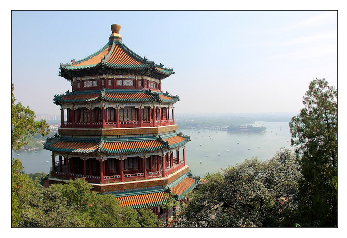

In [38]:
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [39]:
data=china/255.0

In [40]:
data=data.reshape(427*640,3)

In [41]:
print(data.shape)

(273280, 3)


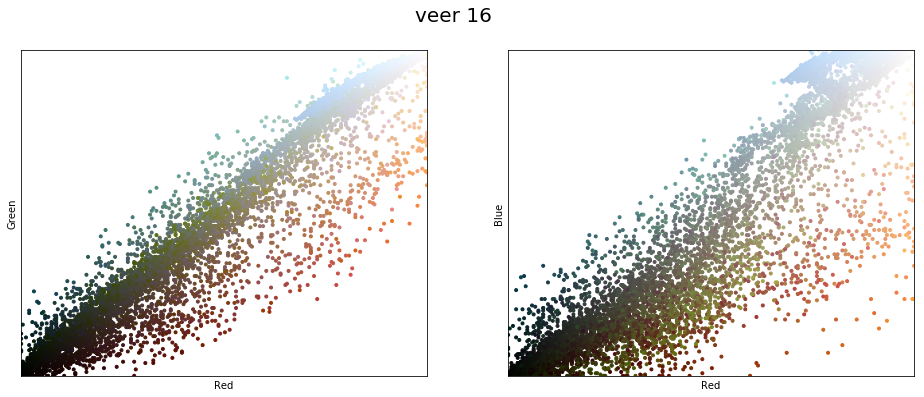

In [42]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20)
plot_pixels(data,title='veer 16')
plt.show()
        
    

In [43]:
import warnings
warnings.simplefilter('ignore')

In [61]:
from sklearn.cluster import MiniBatchKMeans

In [62]:
kmeans= MiniBatchKMeans(12)

In [53]:
kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=12, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [54]:
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

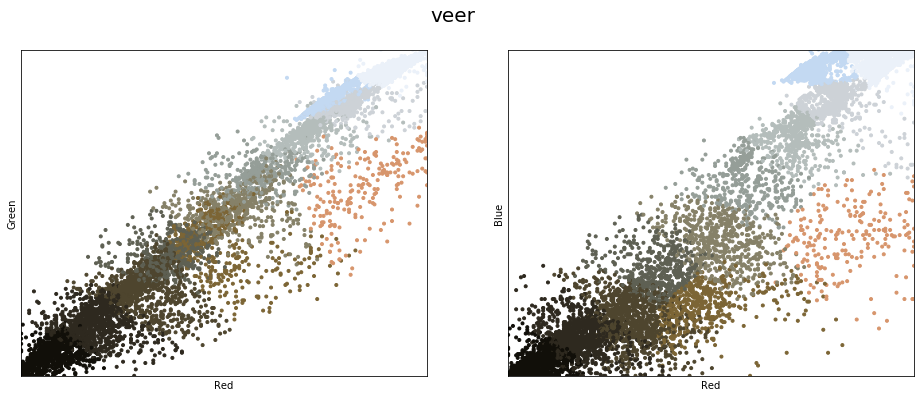

In [55]:
plot_pixels(data,colors=new_colors,title="veer")

In [56]:
china_recolored=new_colors.reshape(china.shape)

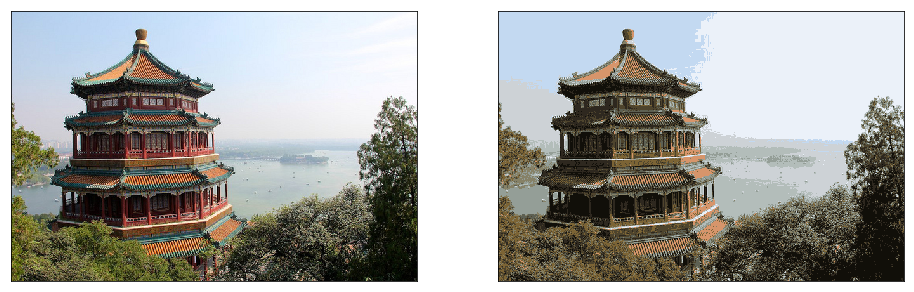

In [63]:
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
#fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)

ax[1].imshow(china_recolored)